# Simulación acto graduación




Listado de las personas que van a desfilar,

tiempos,

asiento,

si no va la persona,

tiempo total de la graduación, etc..




> # Importar libreria

In [156]:
# install Pint if necessary
try:
    import pint
except ImportError:
    !pip install pint

# download modsim.py if necessary
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')


In [157]:
# import functions from modsim
from modsim import *
#import random
import random as r

from numpy import *

> # Código
---

In [158]:
poblacionEst = r.randint(500,801)

In [159]:
import random as r

In [160]:
system = System(tiempo_total = 0,
                poblacion = int(poblacionEst - poblacionEst * 0.02)
                )

print(system.poblacion)

609


In [161]:
t_total = system.tiempo_total

In [162]:
diaUno = round(system.poblacion * 0.45)
diaDos = round(system.poblacion * 0.55)
print(diaUno, diaDos)

274 335


In [163]:
def varEstado():
  import random as r
  state = State(apertura = r.randint(10, 15), desfile_autoridades = r.randint(4, 11),
                himnos = r.randint(6, 8), rectoria_palabras = r.randint(20, 40),
                juramento = 2,
                discurso_egresados = r.randint(5,8),
                himnoUnphu = 3,
                salida = r.randint(6, 11)
                )
  return state

In [164]:
def varEntrega():
  import random as r
  state = State(entregaDiplomas = r.uniform(0.03, 0.30),
                premios_entregas = r.randint(15, 21)
                )
  return state

In [165]:
def run_simulation(poblacion):
  s = varEstado()
  z = varEntrega()
  faseInicial = s.apertura + s.desfile_autoridades + s.himnos + s.rectoria_palabras

  results = TimeSeries()
  results[t_total] = poblacion
  results[faseInicial] = poblacion

  count = 0
  i = faseInicial
  graduadosFinal = poblacion

  while count < poblacion:
    i += z.entregaDiplomas
    graduadosFinal -= 1
    results[i] = graduadosFinal
    count += 1

  results[i + s.juramento] = 0

  import random as r
  count = 0
  p0 = poblacion * r.uniform(0.05, 0.08)

  while count < poblacion:
    i += z.entregaDiplomas
    p0 -= 1
    results[i] = 0
    count += 1

  results[i + s.discurso_egresados] = graduadosFinal
  results[i + s.himnoUnphu] = graduadosFinal
  results[i + s.salida ] = graduadosFinal

  return round(results)

In [267]:
r = run_simulation(diaUno)
r2 = run_simulation(diaDos)
print(r)

Time
0.000000      274
72.000000     274
72.207626     273
72.415253     272
72.622879     271
             ... 
185.364010      0
185.571637      0
185.779263      0
193.779263      0
188.779263      0
Name: Quantity, Length: 553, dtype: int64


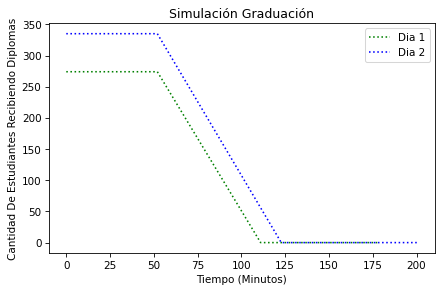

In [266]:
r.plot(color='green', label='Dia 1', style = ':' )
r2.plot(color='blue', label='Dia 2', style = ':' )
decorate(title= 'Simulación Graduación',
             xlabel = 'Tiempo (Minutos)',
             ylabel = 'Cantidad De Estudiantes Recibiendo Diplomas' )

In [264]:
def minutos_hora(x):
  import math
  conversion = round(x.index[-1] / 60, 2)
  parte_decimal, parte_entera = math.modf(conversion)

  return "Horas: " + str(int(parte_entera)) + "\tMinutos: " + str(int(parte_decimal * 100))

In [265]:
print("Duración graduación día 1 - " + minutos_hora(r))
print("Duración graduación día 2 - " + minutos_hora(r2))

Duración graduación día 1 - Horas: 2	Minutos: 95
Duración graduación día 2 - Horas: 3	Minutos: 33
